 # Churn Prediction Analysis

## Data Loading and Cleaning

In [500]:
cd "C:\Users\ancha\OneDrive\Desktop"


C:\Users\ancha\OneDrive\Desktop


In [501]:
#importing necessary packages

!pip install plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import hist
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
import matplotlib.ticker as mtick
from pandas.plotting import scatter_matrix

In [502]:
#importing dataset and dropping any NA values
customer_df= pd.read_csv("Churn Modeling.csv")
dataset1= pd.read_csv("Churn Modeling.csv")
customer_df=customer_df.dropna()

#Evaluating data structure
print(customer_df.dtypes)
customer_df.head()
customer_df.columns
customer_df.describe()

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasChckng            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
count,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,5001.842153,1.569095e+07,650.496849,38.943983,5.014904,76489.739835,1.530359,0.705512,0.515055,100074.736622,0.203761
std,2886.288486,7.193993e+04,96.708600,10.615222,2.903145,62401.145734,0.581669,0.455835,0.499798,57510.502782,0.402814
min,1.000000,1.556570e+07,305.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2503.000000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50974.570000,0.000000
50%,5002.000000,1.569074e+07,652.000000,37.000000,5.000000,97208.460000,1.000000,1.000000,1.000000,100183.050000,0.000000
75%,7501.000000,1.575325e+07,718.000000,44.000000,7.000000,127649.640000,2.000000,1.000000,1.000000,149384.430000,0.000000
max,10000.000000,1.581569e+07,865.000000,190.000000,30.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis

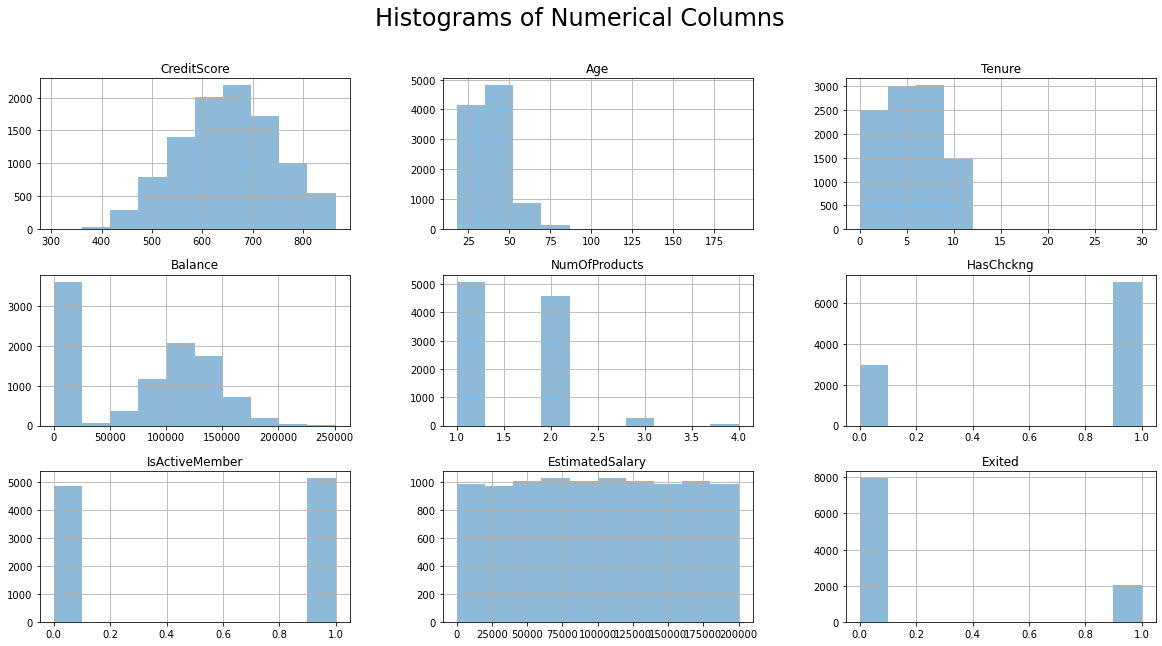

In [503]:
#dataset2 = customer_df[['CreditScore', 'Age', 'Balance','NumOfProducts','EstimatedSalary']]
dataset2=customer_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
#Histogram:

dataset2.hist(alpha=0.5,figsize=(20, 10))

#plt.title("Linear graph")
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24)
plt.show()

<ipython-input-504-2197aa7e3f67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(


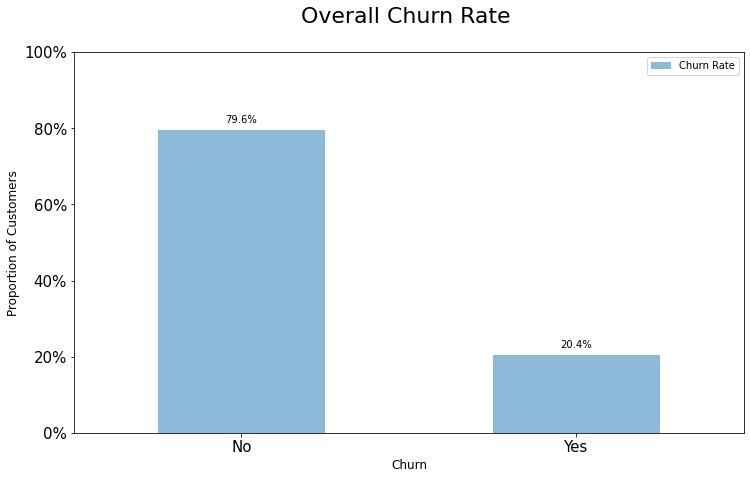

In [504]:
churn_rate = customer_df[["Exited", "CustomerId"]]
churn_rate ["churn_label"] = pd.Series(
np.where((churn_rate["Exited"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["CustomerId"].count())
churn_rate ["Churn Rate"] = (
churn_rate ["CustomerId"]/ sum(churn_rate ["CustomerId"]) )*100
ax = churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), alpha=0.5,fontsize = 15, stacked=False, 
ylim =(0,100))
plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
        ax.annotate(label,
                (x_value, y_value),         
                 xytext=(0, space),
                 textcoords="offset points", 
                 ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)


In [505]:
import matplotlib.ticker as mtick
def graph(col_name):
    contract_churn = customer_df.groupby(
    [col_name,'Exited']).size().unstack()
    contract_churn.rename(
    columns={0:'No', 1:'Yes'}, inplace=True)
    #colors  = ['#ec838a','#9b9c9a']
    ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),alpha=0.5)
    plt.ylabel('Proportion of Customers\n',
    horizontalalignment="center",fontstyle = "normal", 
    fontsize = "large", fontfamily = "sans-serif")
    plt.xlabel(col_name,horizontalalignment="center")
    plt.title('Churn Rate by '+col_name,
    horizontalalignment="center", fontstyle = "normal", fontsize = "22")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)


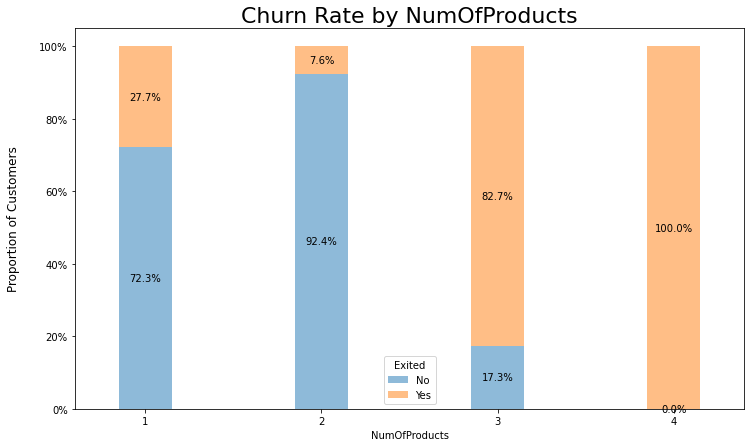

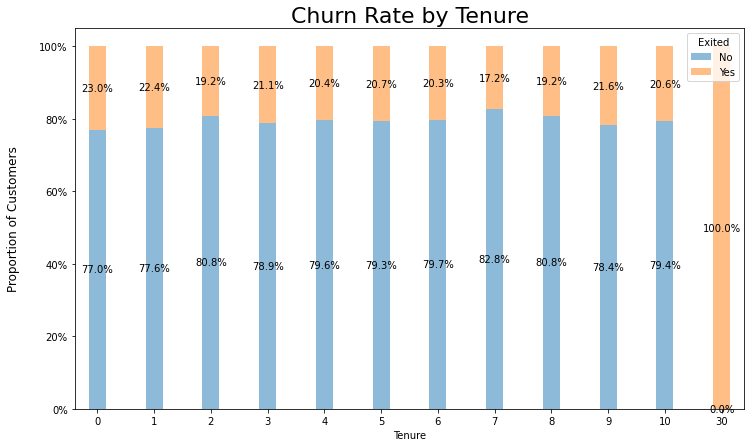

In [546]:
graph('NumOfProducts')
graph('Tenure')

<function matplotlib.pyplot.show(close=None, block=None)>

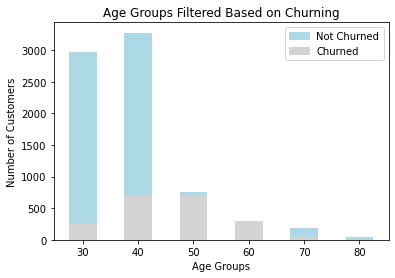

In [507]:
age_0= customer_df.loc[(customer_df['Exited'] ==0)]
age_1= customer_df.loc[(customer_df['Exited'] ==1)]
plt.hist(age_0['Age'],bins=[25,35,45,55,65,75,85],histtype='bar',rwidth=0.5,color='lightBlue')
plt.hist(age_1['Age'],bins=[25,35,45,55,65,75,85], histtype='bar',rwidth=0.5,color='lightGrey')
Exited_0 = mpatches.Patch(color='lightBlue', label='Not Churned')
Exited_1 = mpatches.Patch(color='lightGrey', label='Churned')
plt.legend(handles=[Exited_0,Exited_1])
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.title('Age Groups Filtered Based on Churning')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

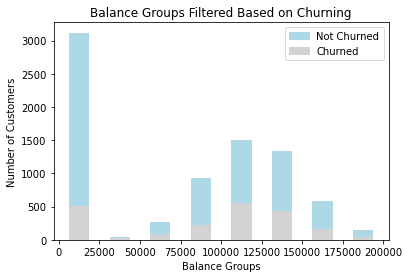

In [508]:
age_0= customer_df.loc[(customer_df['Exited'] ==0)]
age_1= customer_df.loc[(customer_df['Exited'] ==1)]
plt.hist(age_0['Balance'],bins=[0,25000,50000,75000,100000,125000,150000,175000,200000],histtype='bar',rwidth=0.5,color='lightBlue')
plt.hist(age_1['Balance'],bins=[0,25000,50000,75000,100000,125000,150000,175000,200000],histtype='bar',rwidth=0.5,color='lightGrey')
Exited_0 = mpatches.Patch(color='lightBlue', label='Not Churned')
Exited_1 = mpatches.Patch(color='lightGrey', label='Churned')
plt.legend(handles=[Exited_0,Exited_1])
plt.xlabel("Balance Groups")
plt.ylabel("Number of Customers")
plt.title('Balance Groups Filtered Based on Churning')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

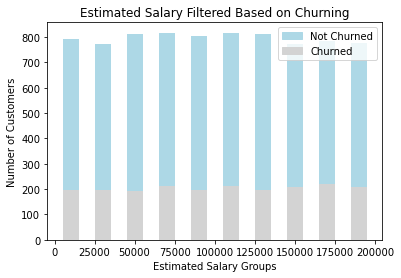

In [509]:
age_0= customer_df.loc[(customer_df['Exited'] ==0)]
age_1= customer_df.loc[(customer_df['Exited'] ==1)]
plt.hist(age_0['EstimatedSalary'],histtype='bar',rwidth=0.5,color='lightBlue')
plt.hist(age_1['EstimatedSalary'], histtype='bar',rwidth=0.5,color='lightGrey')
Exited_0 = mpatches.Patch(color='lightBlue', label='Not Churned')
Exited_1 = mpatches.Patch(color='lightGrey', label='Churned')
plt.legend(handles=[Exited_0,Exited_1])
plt.xlabel("Estimated Salary Groups")
plt.ylabel("Number of Customers")
plt.title('Estimated Salary Filtered Based on Churning')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

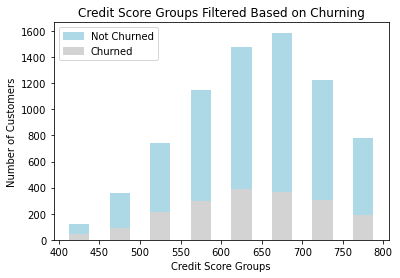

In [510]:
age_0= customer_df.loc[(customer_df['Exited'] ==0)]
age_1= customer_df.loc[(customer_df['Exited'] ==1)]
plt.hist(age_0['CreditScore'],bins=[400,450,500,550,600,650,700,750,800],histtype='bar',rwidth=0.5,color='lightBlue')
plt.hist(age_1['CreditScore'],bins=[400,450,500,550,600,650,700,750,800], histtype='bar',rwidth=0.5,color='lightGrey')
Exited_0 = mpatches.Patch(color='lightBlue', label='Not Churned')
Exited_1 = mpatches.Patch(color='lightGrey', label='Churned')
plt.legend(handles=[Exited_0,Exited_1])
plt.xlabel("Credit Score Groups")
plt.ylabel("Number of Customers")
plt.title('Credit Score Groups Filtered Based on Churning')
plt.show

## Data Preparation for Modeling

In [511]:
dataset = customer_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

In [512]:
#Splitting up the dataset into features and labels
X =  dataset.drop(['Exited'], axis=1)
print(X)
y = dataset['Exited']

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasChckng  \
0           619.0   42       2       0.00              1          1   
1           608.0   41       1   83807.86              1          0   
2           502.0   42       8  159660.80              3          1   
3           699.0   39       1       0.00              2          0   
4           850.0   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995        771.0   39       5       0.00              2          1   
9996        516.0   35      10   57369.61              1          1   
9997        709.0   36       7       0.00              1          0   
9998        772.0   42       3   75075.31              2          1   
9999        792.0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  
0                  1        101348.88  
1                  1        112542.58  
2                  0       

In [513]:
#Splitting the features and labels into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Modeling

### Model 1: Random Forest Modeling

In [514]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

In [515]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.856
Precision: 0.7692307692307693
Recall: 0.4176904176904177


<AxesSubplot:>

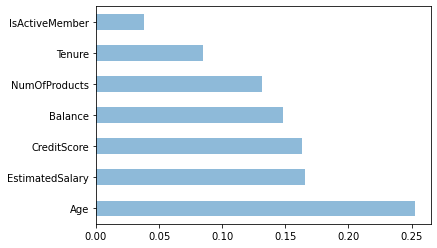

In [516]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh',alpha=0.5)

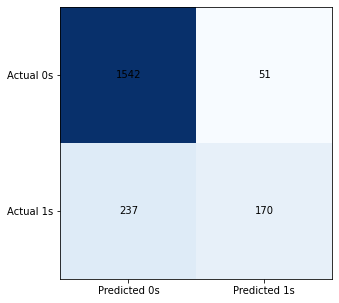

In [517]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()

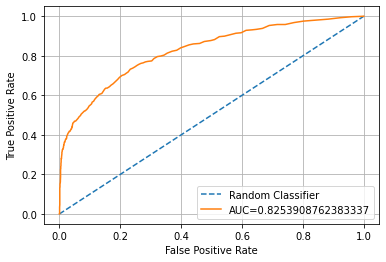

In [518]:
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve

plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Creating and updating the dataframe of models
df_models = pd.DataFrame()
df3= {'Model':'Random Forest','Accuracy': accuracy_score(y_test, y_pred ), 'Precision': precision_score(y_test, y_pred ), 'Recall': recall_score(y_test, y_pred ),'AUC':auc}
df_models = df_models.append(df3, ignore_index = True)

### Model 2: Multinomial Logistic Regression

In [519]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred_log=logreg.predict(X_test)

In [520]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.7865
Precision: 0.35294117647058826
Recall: 0.05896805896805897


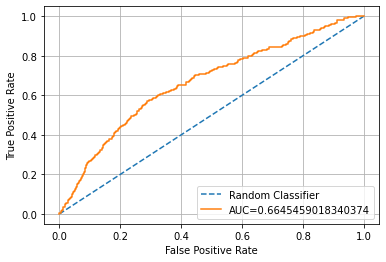

In [521]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve
plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#updating the model dataframe

df4= {'Model':'Multinomial Logistic Regression','Accuracy': accuracy_score(y_test, y_pred_log), 'Precision': precision_score(y_test, y_pred_log ), 'Recall': recall_score(y_test, y_pred_log ),'AUC':metrics.roc_auc_score(y_test, y_pred_log)}
df_models = df_models.append(df4, ignore_index = True)

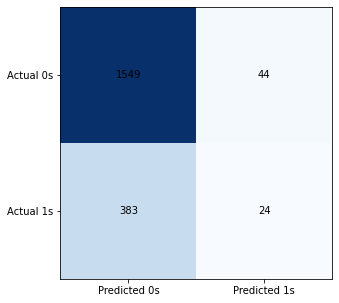

In [522]:
cm = confusion_matrix(y_test, y_pred_log)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()

### Model 3: Decision Tree

In [523]:
classifier_decision=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_decision.fit(X_train, y_train) 
y_pred_dec = classifier_decision.predict(X_test)

In [524]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dec))
print("Precision:",metrics.precision_score(y_test, y_pred_dec))
print("Recall:",metrics.recall_score(y_test, y_pred_dec))

Accuracy: 0.784
Precision: 0.4691358024691358
Recall: 0.4668304668304668


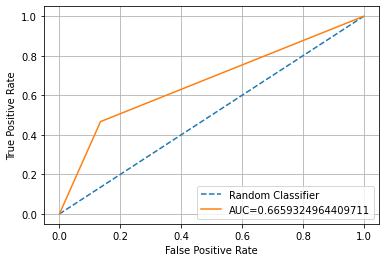

In [525]:
#y_pred_proba = classifier_decision.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dec)
auc = metrics.roc_auc_score(y_test, y_pred_dec)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve
plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

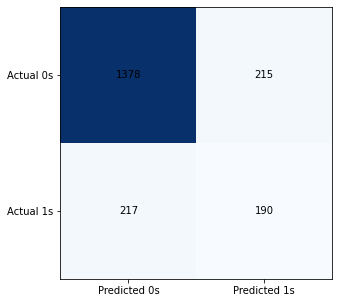

In [526]:
cm = confusion_matrix(y_test, y_pred_dec)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()

In [527]:
df5= {'Model':'Decision Tree','Accuracy': accuracy_score(y_test, y_pred_dec), 'Precision': precision_score(y_test, y_pred_dec ), 'Recall': recall_score(y_test, y_pred_dec ),'AUC':metrics.roc_auc_score(y_test, y_pred_dec)}
df_models = df_models.append(df5, ignore_index = True)

### Model 4: Gaussian NB

In [528]:
guassian=GaussianNB()
guassian.fit(X_train, y_train) 
y_pred_gaussian = guassian.predict(X_test)

In [529]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gaussian))
print("Precision:",metrics.precision_score(y_test, y_pred_gaussian))
print("Recall:",metrics.recall_score(y_test, y_pred_gaussian))

Accuracy: 0.7835
Precision: 0.32894736842105265
Recall: 0.06142506142506143


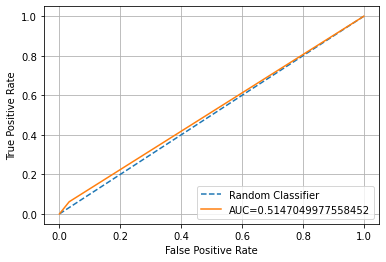

In [530]:
#y_pred_proba = classifier_decision.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gaussian)
auc = metrics.roc_auc_score(y_test, y_pred_gaussian)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve
plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

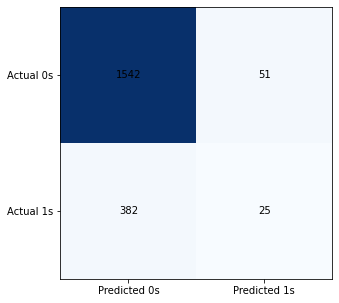

In [531]:
cm1 = confusion_matrix(y_test, y_pred_gaussian)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm1[i, j], ha='center', va='center', color='Black')
plt.show()

In [532]:
df6= {'Model':'Gaussian NB','Accuracy': accuracy_score(y_test, y_pred_gaussian), 'Precision': precision_score(y_test, y_pred_gaussian ), 'Recall': recall_score(y_test, y_pred_gaussian ),'AUC':metrics.roc_auc_score(y_test, y_pred_gaussian)}
df_models = df_models.append(df6, ignore_index = True)

### Model 5: Fine Tuning Logistic Regression

In [533]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [534]:
def featureselection(n):
    lreg = LinearRegression()
    sfs1 = sfs(lreg, k_features=n, forward=True, verbose=2, scoring='neg_mean_squared_error')
    sfs1 = sfs1.fit(X, y)
    feat_names = list(sfs1.k_feature_names_)
    new_data = customer_df[feat_names]
    new_data['Exited'] = customer_df['Exited']
    X_feat3 =  new_data.drop(['Exited'], axis=1)
#print(X)
    y_feat3 = new_data['Exited']
    from sklearn.model_selection import train_test_split
    X_feat3_train, X_feat3_test, y_feat3_train, y_feat3_test = train_test_split(X_feat3, y_feat3, test_size = 0.2, random_state = 0)
    logreg = LogisticRegression()

# fit the model with data
    logreg.fit(X_feat3_train,y_feat3_train)

#
    y_pred_feat3=logreg.predict(X_feat3_test)
    Accuracy=metrics.accuracy_score(y_test, y_pred_feat3)
    #return Accuracy
    Precision=metrics.precision_score(y_test, y_pred_feat3)
    #return Precision
    Recall=metrics.recall_score(y_test, y_pred_feat3)
    l=[]
    l.append(Accuracy)
    l.append(Precision)
    l.append(Recall)
    return l

In [535]:
df = pd.DataFrame()
for i in range(1,7):
    k_features=i
    m=featureselection(k_features)
    df2 = {'k_features':i,'Accuracy': m[0], 'Precision': m[1], 'Recall': m[2]}
    df = df.append(df2, ignore_index = True)
    i=i+1
df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-03-23 17:41:20] Features: 1/1 -- score: -0.14950285203369296<ipython-input-534-071dcc8c40fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Exited'] = customer_df['Exited']
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-03-23 17:41:20] Features: 1/2 -- score: -0.14950285203369296[Parallel(n_jobs=1)]: Using backend

,Accuracy,Precision,Recall,k_features
0,0.7750,0.197183,0.034398,1.0
1,0.8015,0.558140,0.117936,2.0
2,0.7965,0.000000,0.000000,3.0
3,0.7885,0.385714,0.066339,4.0
4,0.7880,0.380282,0.066339,5.0
5,0.7865,0.352941,0.058968,6.0


In [536]:
column_names = ["Model", "Accuracy", "Precision","Recall","AUC"]

df_models = df_models.reindex(columns=column_names)
df_models=df_models.sort_values('Accuracy',ascending=False)
df_models


,Model,Accuracy,Precision,Recall,AUC
0,Random Forest,0.8560,0.769231,0.417690,0.825391
1,Multinomial Logistic Regression,0.7865,0.352941,0.058968,0.515674
2,Decision Tree,0.7840,0.469136,0.466830,0.665932
3,Gaussian NB,0.7835,0.328947,0.061425,0.514705


In [537]:
column_names_kfeatures = ["k_features", "Accuracy", "Precision","Recall"]
df=df.reindex(columns=column_names_kfeatures)
df=df.sort_values('Accuracy',ascending=False)
df

,k_features,Accuracy,Precision,Recall
1,2.0,0.8015,0.558140,0.117936
2,3.0,0.7965,0.000000,0.000000
3,4.0,0.7885,0.385714,0.066339
4,5.0,0.7880,0.380282,0.066339
5,6.0,0.7865,0.352941,0.058968
0,1.0,0.7750,0.197183,0.034398


In [538]:
classifier = LogisticRegression(random_state = 0,
penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression    0.7865   0.352941  0.058968  0.101053  0.070755


In [539]:
accuracies = cross_val_score(estimator = classifier,
 X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


Logistic Regression Classifier Accuracy: 0.79 (+/- 0.01)


In [540]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
dataset2 = dataset[['Age', 
'CreditScore', 'Tenure', 'Balance',
'NumOfProducts', 'HasChckng',
'IsActiveMember','EstimatedSalary']]
calc_vif(dataset2)

,variables,VIF
0,Age,12.054463
1,CreditScore,20.399330
2,Tenure,3.845845
3,Balance,2.623671
4,NumOfProducts,7.708980
5,HasChckng,3.284821
6,IsActiveMember,2.069993
7,EstimatedSalary,3.881873


Text(0.5, 1.0, 'Collinearity of Age and Balance \n')

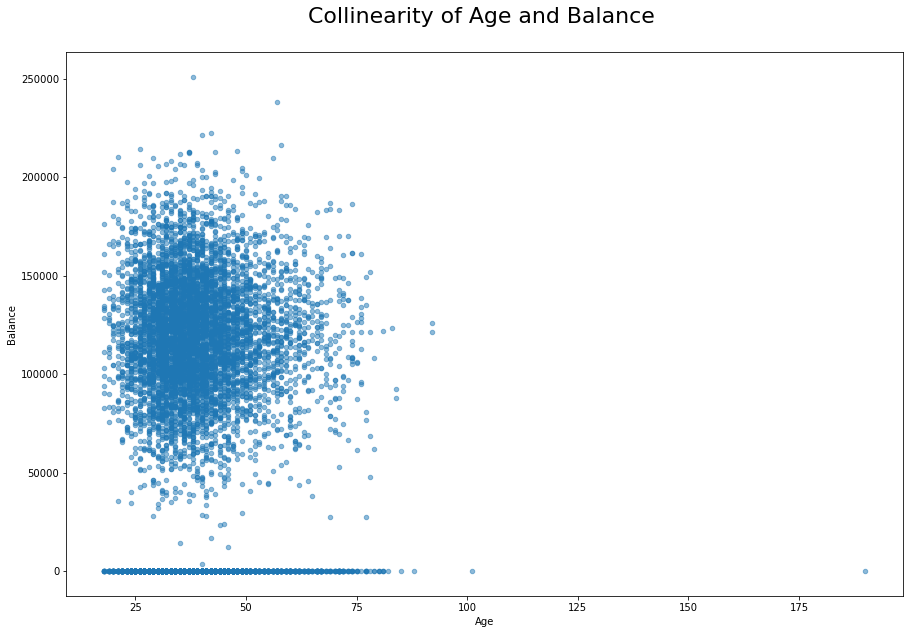

In [552]:
#Check colinearity:
    
customer_df[['Age', 'Balance']].plot.scatter(
figsize = (15, 10), x ='Age',y='Balance', alpha=0.5)
plt.title('Collinearity of Age and Balance \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

### Final Model and Predictions

In [542]:
#Identify response variable:
dataset1=dataset1.dropna()
response = dataset1['Exited']
dataset1 = dataset1.drop(columns=["Exited","Surname","RowNumber","Geography","Gender","Tenure","NumOfProducts","HasChckng","IsActiveMember"])
X_train, X_test, y_train, y_test = train_test_split(dataset1, response,test_size = 0.2, random_state = 0)
train_identity = X_train['CustomerId']
X_train = X_train.drop(columns = ['CustomerId'])
test_identity = X_test['CustomerId']
X_test = X_test.drop(columns = ['CustomerId'])
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['CustomerId', 'Exited', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))



In [543]:
#final model
final_results.sort_values('propensity_to_churn(%)',ascending=False)

,CustomerId,Exited,predictions,propensity_to_churn(%),Ranking
2473,15679249,1,1,74.31,1
2901,15603246,0,1,74.12,1
9765,15777067,0,1,72.80,1
3462,15713596,0,1,70.14,1
1981,15630913,0,1,68.90,1
...,...,...,...,...,...
3753,15578211,0,0,4.20,10
2563,15645463,0,0,4.14,10
1121,15672704,0,0,3.59,10
1088,15645517,0,0,3.53,10


In [544]:
#Testing out some values
new_input=[[619,42,0.00,101348.88]]
lr_classifier.predict(new_input)

array([0], dtype=int64)

In [545]:
print(dataset1)
print(response)

      CustomerId  CreditScore  Age    Balance  EstimatedSalary
0       15634602        619.0   42       0.00        101348.88
1       15647311        608.0   41   83807.86        112542.58
2       15619304        502.0   42  159660.80        113931.57
3       15701354        699.0   39       0.00         93826.63
4       15737888        850.0   43  125510.82         79084.10
...          ...          ...  ...        ...              ...
9995    15606229        771.0   39       0.00         96270.64
9996    15569892        516.0   35   57369.61        101699.77
9997    15584532        709.0   36       0.00         42085.58
9998    15682355        772.0   42   75075.31         92888.52
9999    15628319        792.0   28  130142.79         38190.78

[9997 rows x 5 columns]
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9997, dtype: int64
